In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, classification_report

In [ ]:
path = "/content/drive/MyDrive/ABSA"

In [ ]:
df = pd.read_csv(f"{path}/DatasetRaw/Processed_full_data.csv")


In [ ]:
df

,character,content,scene,sound,Cmt,processed_cmt
0,P,O,P,P,Cũng tạm ổn khúc cuối hơi không hiểu cần làm r...,cũng tạm ổn_khúc cuối hơi không hiểu cần làm r...
1,O,P,P,P,Phim khá ổn so với thể loại phim kinh dị của V...,phim khá ổn so với thể_loại phim kinh_dị của v...
2,P,P,P,P,Lần đầu làm chuyện ấy phim hay kinh dị nhưng k...,lần đầu làm chuyện ấy phim hay kinh_dị nhưng k...
3,P,P,P,N,"Thấy phim OK mà bị mọi người chê dữ, có bám th...",thấy phim ok mà bị mọi người chê_dữ có bám the...
4,P,N,N,N,"Phim lan man. góc quay siêu xấu luôn ấy, nhìn ...",phim lan_man góc quay siêu xấu luôn ấy nhìn cứ...
...,...,...,...,...,...,...
4757,X,X,O,X,Cảnh phim tuy không quá đặc sắc nhưng đủ để là...,cảnh phim tuy không quá đặc_sắc nhưng đủ để là...
4758,X,X,O,X,"Bối cảnh trong phim được thiết kế đơn giản, gi...",bối_cảnh trong phim được thiết_kế đơn_giản giú...
4759,X,X,O,X,"Cảnh phim được bố trí hợp lý, không làm mất đi...",cảnh phim được bố_trí hợp_lý không làm mất đi ...
4760,X,X,O,X,Bối cảnh trong phim không quá nổi bật nhưng kh...,bối_cảnh trong phim không quá nổi_bật nhưng kh...


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   character      4762 non-null   object
 1   content        4762 non-null   object
 2   scene          4762 non-null   object
 3   sound          4762 non-null   object
 4   Cmt            4762 non-null   object
 5   processed_cmt  4759 non-null   object
dtypes: object(6)
memory usage: 223.3+ KB


In [ ]:
categories = ['character', 'content', 'scene', 'sound']


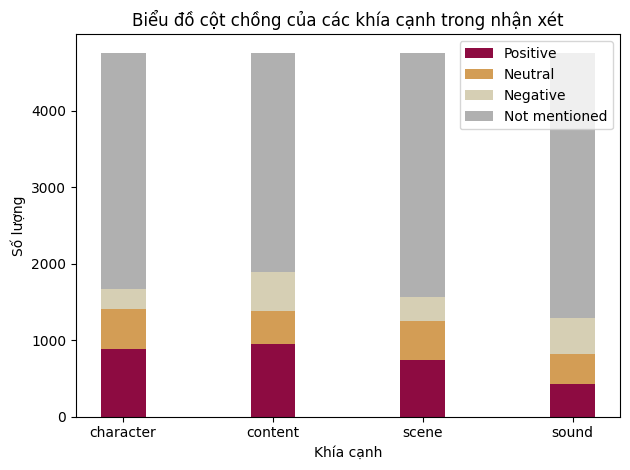

In [ ]:
sumary = {
    'Positive' : [df[col].value_counts().get('P', 0) for col in categories],
    'Negative' : [df[col].value_counts().get('N', 0) for col in categories],
    'Neutral' : [df[col].value_counts().get('O', 0) for col in categories],
    'Not mentioned' : [df[col].value_counts().get('X', 0) for col in categories]
}

x = np.arange(len(categories))

positive = sumary['Positive']
neutral = sumary['Neutral']
negative = sumary['Negative']
not_mentioned = sumary['Not mentioned']

p1 = plt.bar(x, positive, width=0.3, label='Positive', color='#8D0B41')
p2 = plt.bar(x, neutral, width=0.3, bottom=positive, label='Neutral', color='#D39D55')
p3 = plt.bar(x, negative, width=0.3, bottom=np.array(positive) + np.array(neutral), label='Negative', color='#D6CFB4')
p4 = plt.bar(x, not_mentioned, width=0.3, bottom=np.array(positive) + np.array(neutral) + np.array(negative), label='Not mentioned', color='#B0B0B0')

plt.xticks(x, categories)
plt.xlabel('Khía cạnh')
plt.ylabel('Số lượng')
plt.title('Biểu đồ cột chồng của các khía cạnh trong nhận xét')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(sumary)
df

,Positive,Negative,Neutral,Not mentioned
0,891,266,519,3085
1,949,517,430,2864
2,748,312,501,3199
3,433,466,392,3469


In [ ]:
dfLy = pd.read_csv("/content/drive/MyDrive/ABSA/DatasetRaw/LabelingLy.csv")
dfQ = pd.read_csv("/content/drive/MyDrive/ABSA/DatasetRaw/LabelingQuynh.csv")
dfQ = dfQ[:2001]
dfLyAPI = pd.read_csv("/content/drive/MyDrive/ABSA/DatasetRaw/LabelingLyAPI.csv")
dfQAPI = pd.read_csv("/content/drive/MyDrive/ABSA/DatasetRaw/LabelingQuynhAPI.csv")
dfQAPI = dfQAPI[:2001]


In [ ]:
dfLy = dfLy.rename(columns={' Acting': 'character'})
dfLy

,character,Plot,Scene,Sound,Cmt
0,X,X,X,X,￼ Đừng cho mấy đứa hay nói chuyện vô rạp phiền...
1,X,O,P,X,"- Motip phim không mới, kết phim cũng không ph..."
2,N,N,N,X,"! phim này coi như kiểu phim tự sự, tình tiết ..."
3,P,P,P,X,"""Bộ phim Aquaman: Vương Quốc Thất Lạc"" là một ..."
4,O,O,X,X,"""Fantastic, Wonderful, Significant, Magnificen..."
...,...,...,...,...,...
1657,X,X,X,X,Xứng đáng là phim đánh dấu năm kỉ niệm 100 năm...
1658,X,X,X,X,ý là cũn k phí tiền lắm xem cũn được cũn kịch ...
1659,X,X,X,X,Zui. Nghe nói khúc sau còn mà mình có việc nên...
1660,P,O,N,X,🎬 Quánh giá chút về A Quiet Place: Day One thì...


In [ ]:
print(cohen_kappa_score(dfLy['character'], dfLyAPI['character']))
print(cohen_kappa_score(dfLy['Plot'], dfLyAPI['plot']))
print(cohen_kappa_score(dfLy['Scene'], dfLyAPI['scene']))
print(cohen_kappa_score(dfLy['Sound'], dfLyAPI['sound']))


ValueError: Found input variables with inconsistent numbers of samples: [1662, 1664]

In [ ]:
print(cohen_kappa_score(dfQ['character'], dfQAPI['character']))
print(cohen_kappa_score(dfQ['plot'], dfQAPI['plot']))
print(cohen_kappa_score(dfQ['scene'], dfQAPI['scene']))
print(cohen_kappa_score(dfQ['sound'], dfQAPI['sound']))


0.37067392669351185
0.5001533097758033
0.5392932811977669
0.5958965457171795
